# Exploring ENCODE database

## Setup

In [1]:
import sys
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
sys.path.append("/usr/local/dev_scripts")

import encodex

In [3]:
experiments_of_interest = ["ENCSR767LLP"] # An eCLIP dataset with RBFOX2 as target
region_of_interest = ("chr9", 94178791, 94178963) # positions of miRNA let-7-d

In [4]:
gencode_annotation = "s3://encode-public/2019/06/04/8f6cba12-2ebe-4bec-a15d-53f498979de0/gencode.v29.primary_assembly.annotation_UCSC_names.gtf.gz"

## Retrieve and read files manifest

In [5]:
encodedb_files = encodex.io.read_files_manifest()
encodedb_files.head()

,accession,status,file_format,file_type,assembly,award.rfa,s3_uri,cloud_metadata.url,dataset,lab.@id,output_type,output_category,file_size,date_created,md5sum,cloud_metadata.md5sum_base64,replicate_libraries,analysis_step_version.analysis_step.name
0,ENCFF645BQN,released,bigWig,bigWig,hg19,ENCODE4,s3://encode-public/2021/02/01/9c26c11a-95c6-4e...,https://encode-public.s3.amazonaws.com/2021/02...,/annotations/ENCSR000CVU/,/labs/manolis-kellis/,signal p-value,signal,217777294,2021-02-01T18:10:32.524390+00:00,0f17a4b1d126dd9db740498d2a9b073d,DxeksdEm3Z23QEmNKpsHPQ==,NaN,chrom-impute-signal-generation-step-v-1
1,ENCFF861KNS,released,bigWig,bigWig,GRCh38,ENCODE,s3://encode-public/2020/01/27/7c3d6d72-043c-4a...,https://encode-public.s3.amazonaws.com/2020/01...,/annotations/ENCSR000FHB/,/labs/bill-noble/,signal p-value,signal,620684907,2020-01-27T17:44:54.621879+00:00,747f0f27a1593d6d8dd8a922a7189b56,dH8PJ6FZPW2N2KkipxibVg==,NaN,NaN
2,ENCFF264GZO,released,bigWig,bigWig,hg19,ENCODE4,s3://encode-public/2021/02/01/4babd750-2249-4c...,https://encode-public.s3.amazonaws.com/2021/02...,/annotations/ENCSR000FIW/,/labs/manolis-kellis/,signal p-value,signal,238885899,2021-02-01T18:53:06.235306+00:00,5717044d4b920e68c86a77758fd86d79,VxcETUuSDmjIand1j9hteQ==,NaN,chrom-impute-signal-generation-step-v-1
3,ENCFF444TKN,archived,bed,bed bed12,hg19,community,s3://encode-public/2021/03/02/a13e70ef-7151-49...,https://encode-public.s3.amazonaws.com/2021/03...,/annotations/ENCSR000FKC/,/labs/alan-boyle/,footprints,annotation,143187,2021-03-02T15:56:50.672191+00:00,7cea0727f64b14ccae147898eccabe70,fOoHJ/ZLFMyuFHiY7Mq+cA==,NaN,NaN
4,ENCFF090KAE,released,bigWig,bigWig,GRCh38,ENCODE,s3://encode-public/2020/01/08/f838b192-da0c-48...,https://encode-public.s3.amazonaws.com/2020/01...,/annotations/ENCSR000FNQ/,/labs/bill-noble/,plus strand signal of all reads,signal,623619892,2020-01-08T13:37:49.202800+00:00,b377547b12188e39a2d13c6a1d2a33b0,s3dUexIYjjmi0TxqHSozsA==,NaN,NaN


## Show signal for experiment in region

In [6]:
bigwigs =  encodex.filters.retrieve_bw_paths_by_experiment(encodedb_files, experiments_of_interest)
bigwigs

,accession,status,file_format,file_type,assembly,award.rfa,s3_uri,cloud_metadata.url,dataset,lab.@id,output_type,output_category,file_size,date_created,md5sum,cloud_metadata.md5sum_base64,replicate_libraries,analysis_step_version.analysis_step.name
635749,ENCFF977SZT,released,bigWig,bigWig,GRCh38,ENCODE4,s3://encode-public/2021/02/02/3e9d110c-8752-49...,https://encode-public.s3.amazonaws.com/2021/02...,/experiments/ENCSR767LLP/,/labs/encode-processing-pipeline/,plus strand signal of unique reads,signal,75192227,2021-02-02T21:46:21.739435+00:00,74755778cfdea523d613803c048fe403,dHVXeM/epSPWE4A8BI/kAw==,NaN,bulk-rna-seq-star-signal-generation-step-v-1
635760,ENCFF481XNQ,released,bigWig,bigWig,GRCh38,ENCODE4,s3://encode-public/2021/02/02/bf104c51-49fe-4e...,https://encode-public.s3.amazonaws.com/2021/02...,/experiments/ENCSR767LLP/,/labs/encode-processing-pipeline/,plus strand signal of unique reads,signal,75662336,2021-02-02T21:46:17.389195+00:00,a04fd73888e04d5efe770c1af89b718c,oE/XOIjgTV7+dwwa+JtxjA==,NaN,bulk-rna-seq-star-signal-generation-step-v-1
635761,ENCFF451RBK,released,bigWig,bigWig,GRCh38,ENCODE3,s3://encode-public/2016/02/05/3912e1b8-a263-4e...,https://encode-public.s3.amazonaws.com/2016/02...,/experiments/ENCSR767LLP/,/labs/encode-processing-pipeline/,plus strand signal of unique reads,signal,75117798,2016-02-05T21:30:53.438278+00:00,7049da6a53f0a2057c00e7554ff3fd6f,cEnaalPwogV8AOdVT/P9bw==,NaN,lrna-pe-star-signal-step-v-1
635762,ENCFF991IZT,released,bigWig,bigWig,GRCh38,ENCODE3,s3://encode-public/2016/02/05/1c900621-64d1-41...,https://encode-public.s3.amazonaws.com/2016/02...,/experiments/ENCSR767LLP/,/labs/encode-processing-pipeline/,plus strand signal of unique reads,signal,68674833,2016-02-05T20:55:12.431472+00:00,34b5974ad1e53163a4a2483a586c2799,NLWXStHlMWOkokg6WGwnmQ==,NaN,lrna-pe-star-signals-for-tophat-step-v-1
635769,ENCFF390ZUH,released,bigWig,bigWig,GRCh38,ENCODE3,s3://encode-public/2016/02/05/a6368e1a-3461-4d...,https://encode-public.s3.amazonaws.com/2016/02...,/experiments/ENCSR767LLP/,/labs/encode-processing-pipeline/,plus strand signal of unique reads,signal,75659241,2016-02-05T21:25:24.126600+00:00,df1e0cd71051d25bee656a193fac4651,3x4M1xBR0lvuZWoZP6xGUQ==,NaN,lrna-pe-star-signal-step-v-1
635772,ENCFF099WWT,released,bigWig,bigWig,GRCh38,ENCODE3,s3://encode-public/2016/02/05/4e65d04e-e0da-47...,https://encode-public.s3.amazonaws.com/2016/02...,/experiments/ENCSR767LLP/,/labs/encode-processing-pipeline/,plus strand signal of unique reads,signal,67727092,2016-02-05T20:49:57.704395+00:00,573d7da2ee2fbe2f2b669d52c10e6342,Vz19ou4vvi8rZp1SwQ5jQg==,NaN,lrna-pe-star-signals-for-tophat-step-v-1


In [7]:
signal_values = encodex.filters.combine_experiment_signals(bigwigs.s3_uri.tolist(), region_of_interest)
signal_values.head()

,ENCFF977SZT,ENCFF481XNQ,ENCFF451RBK,ENCFF991IZT,ENCFF390ZUH,ENCFF099WWT
Position,,,,,,
94178791,0.05861,0.02645,0.05861,0.06692,0.02645,0.0313
94178792,0.05861,0.02645,0.05861,0.06692,0.02645,0.0313
94178793,0.05861,0.02645,0.05861,0.06692,0.02645,0.0313
94178794,0.05861,0.02645,0.05861,0.06692,0.02645,0.0313
94178795,0.05861,0.02645,0.05861,0.06692,0.02645,0.0313


In [11]:
genome_annotation = encodex.io.read_genome_annotation(gencode_annotation)
genome_annotation.loc[
    (genome_annotation.Chr == region_of_interest[0]) &
    (
        (genome_annotation.Start_g < region_of_interest[2]) &
        (genome_annotation.End_g > region_of_interest[1])
    )
]

,Chr,Source,Transcript,Start_g,End_g,Score,Strand,Phase,gene_id,gene_type,...,transcript_support_level,tag,havana_transcript,exon_number,exon_id,ont,protein_id,ccdsid,Start,End
1254609,chr9,HAVANA,gene,94166289,94200627,.,+,.,ENSG00000269946.1,lincRNA,...,NaN,overlapping_locus,NaN,NaN,NaN,NaN,NaN,NaN,94166289,94200627
1254610,chr9,HAVANA,transcript,94166289,94200627,.,+,.,ENSG00000269946.1,lincRNA,...,3,basic,OTTHUMT00000467752.1;,NaN,NaN,NaN,NaN,NaN,94166289,94200627
1254622,chr9,HAVANA,gene,94176602,94204568,.,-,.,ENSG00000230262.6,lincRNA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94176602,94204568
1254623,chr9,HAVANA,transcript,94176602,94204543,.,-,.,ENSG00000230262.6,lincRNA,...,1,basic,OTTHUMT00000053172.3;,NaN,NaN,NaN,NaN,NaN,94176602,94204543
1254628,chr9,HAVANA,transcript,94176602,94204568,.,-,.,ENSG00000230262.6,lincRNA,...,1,NaN,OTTHUMT00000467607.1;,NaN,NaN,NaN,NaN,NaN,94176602,94204568


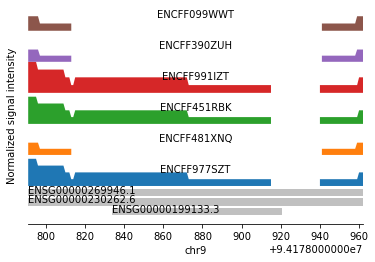

In [12]:
ax = encodex.viz.plot_range_coverage(signal_values, region_of_interest[0], genome_annotation)